# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
def get_files():
    return ("/home/carnd/data/train.p", 
            "/home/carnd/data/test.p")
def get_csv_file():
    return "/home/carnd/git/CarND-Traffic-Sign-Classifier-Project/signnames.csv" 


In [2]:
import cv2
import random

def rgb2gray(func):
    def func_wrapper(*args, **kwargs):
        return cv2.cvtColor(func(*args, **kwargs), cv2.COLOR_RGB2GRAY)
    return func_wrapper

def gray2rgb(func):
    def func_wrapper(*args, **kwargs):
        return cv2.cvtColor(func(*args, **kwargs), cv2.COLOR_GRAY2RGB)
    return func_wrapper

def gray2equalizeHist(func):
    def func_wrapper(*args, **kwargs):
        return cv2.equalizeHist(func(*args, **kwargs))
    return func_wrapper
        
def rgb2hsv(func):
    def func_wrapper(*args, **kwargs):
        return cv2.cvtColor(func(*args, **kwargs), cv2.COLOR_RGB2HSV)
    return func_wrapper

def hsv2rgb(func):
    def func_wrapper(*args, **kwargs):
        return cv2.cvtColor(func(*args, **kwargs), cv2.COLOR_HSV2RGB)
    return func_wrapper

def hsv2equalizeHist(func):
    def func_wrapper(*args, **kwargs):
        h,s,v = cv2.split(func(*args, **kwargs))
        v = cv2.equalizeHist(v)
        return cv2.merge((h,s,v))
    return func_wrapper

def rgb2normalize(func):
    def func_wrapper(*args, **kwargs):
        r,g,b = cv2.split(func(*args, **kwargs))
        x = r.copy()
        r = cv2.normalize(r,x)
        g = cv2.normalize(g,x)
        b = cv2.normalize(b,x)        
        return cv2.merge((r,g,b))
    return func_wrapper    
def no_image(image):
    return image

def rgb2randomRotate(func):
    def func_wrapper(*args, **kwargs):
        img = func(*args, **kwargs)
        rotation = random.uniform(-5, 5)
        rotation_x = random.uniform(-5,5)
        rotation_y = random.uniform(-5,5)        
        (rows,cols,ch) = img.shape
        M = cv2.getRotationMatrix2D((cols/2+rotation_x,rows/2+rotation_y),rotation,1)
        dst = cv2.warpAffine(img,M,(cols,rows))
        return dst
    return func_wrapper    
def no_image(image):
    return image

def rgb2randomTranslate(func):
    def func_wrapper(*args, **kwargs):
        img = func(*args, **kwargs)
        (rows,cols,ch) = img.shape
        rotation_x = random.uniform(-5, 5)
        rotation_y = random.uniform(-5, 5 )
        M = np.float32([[1,0,rotation_x],[0,1,rotation_y]])
        dst = cv2.warpAffine(img,M,(cols,rows))        
        return dst
    return func_wrapper    
def no_image(image):
    return image

@rgb2randomTranslate
def translate_image(image):
    return image

@rgb2randomRotate
def rotate_image(image):
    return image

@rgb2normalize
def norm_image(image):
    return image

@gray2rgb
@gray2equalizeHist
@rgb2gray
def gray_image(image):
    return image

@hsv2rgb
@hsv2equalizeHist
@rgb2hsv
def image2(image):
    return image

def translate_images(images):
    X = [ translate_image(features) for features in images]
    Y = X
    #Y = np.array(X)[:,:,:,:-2]
    return Y

def convert_images(images):
    X = [ no_image(features) for features in images]
    Y = X
    #Y = np.array(X)[:,:,:,:-2]
    return Y

def create_images(images):
    X = [ rotate_image(features) for features in images]
    Y = X
    #Y = np.array(X)[:,:,:,:-2]
    print(len(Y))
    return Y

In [3]:

# Load pickled data
import pickle
import numpy as np 
from sklearn.cross_validation import train_test_split
# TODO: Fill this in based on where you saved the training and testing data

training_file, testing_file = get_files()

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)


train['features'] = np.concatenate((convert_images(train['features']), 
                                    create_images(train['features']),
                                    create_images(train['features']), 
                                    create_images(train['features']),
                                    translate_images(train['features'])
                                   ))
print(len(train['features']))
train['labels'] = np.concatenate((train['labels'], 
                                  train['labels'],
                                  train['labels'],
                                  train['labels'],
                                  train['labels']))
test['features'] = convert_images(test['features'])

X_train, X_validation, y_train, y_validation = train_test_split(train['features'], train['labels'], test_size=0.20, random_state=42)
X_test, y_test = test['features'], test['labels']



/home/carnd/anaconda3/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


39209
39209
39209
196045


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
print(len(X_train[0]))
print(len(X_train[0][0]))
print(len(X_train[0][0][0]))

32
32
3


In [5]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [len(X_train[0]),len(X_train[0][0]),len(X_train[0][0][0])]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 156836
Number of validation examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [6]:
import csv
'''
Get the traffic sign names
'''
with open(get_csv_file(), 'rt') as csvfile:
    spamreader = csv.DictReader(csvfile, delimiter=',', quotechar='|')
    signname = [ row['SignName'] for row in spamreader]
#print(signname)

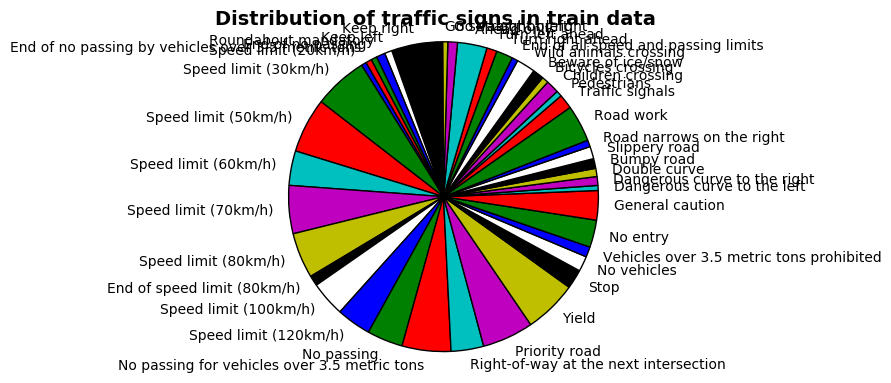

In [7]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

foo = np.unique(y_train,return_counts=True)
count = foo[1]
plt.suptitle("Distribution of traffic signs in train data", fontsize=14, fontweight='bold')
plt.pie(count, labels=signname,shadow=False,startangle=120)
plt.axis('equal')

plt.show()

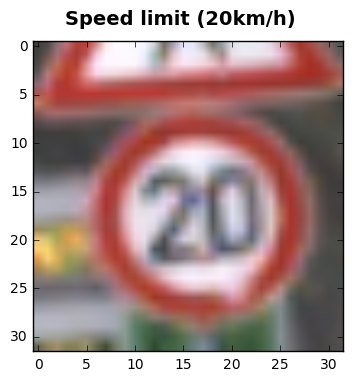

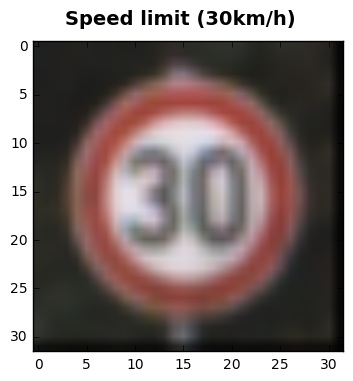

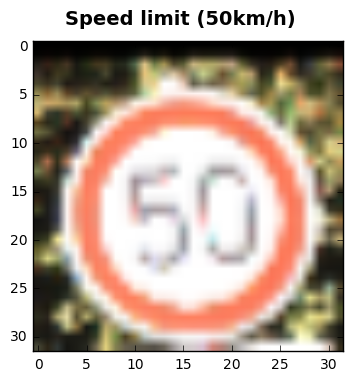

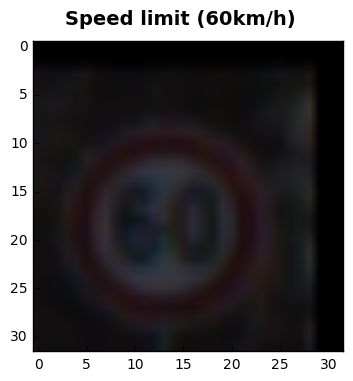

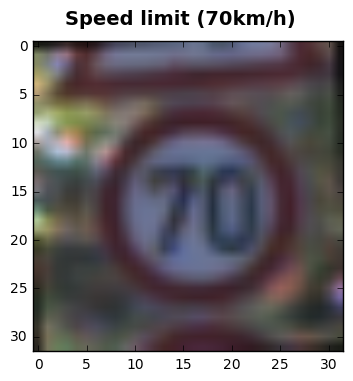

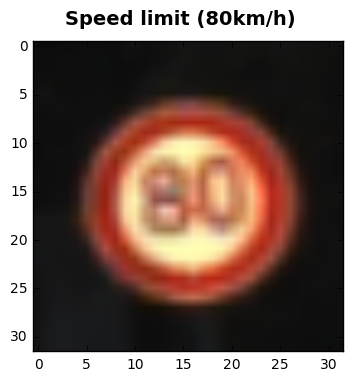

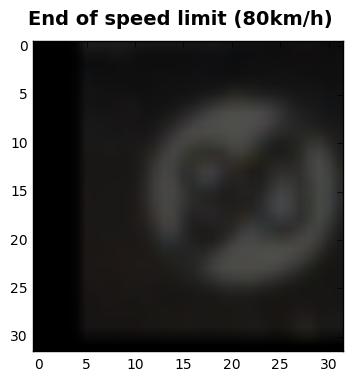

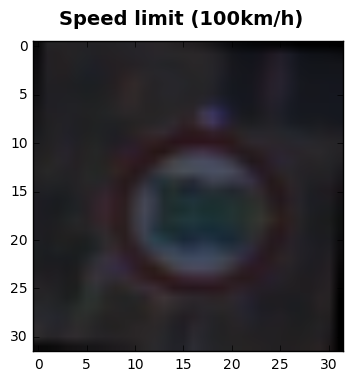

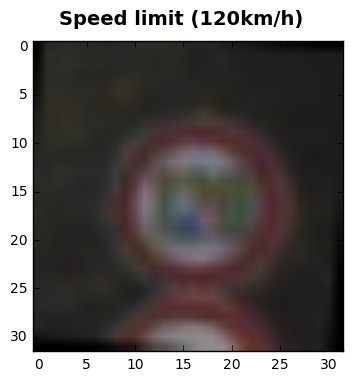

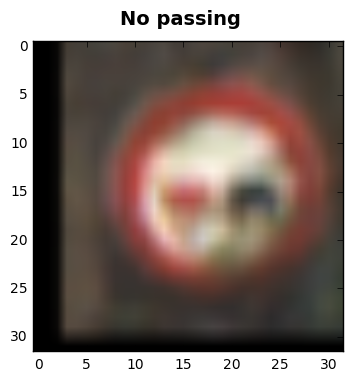

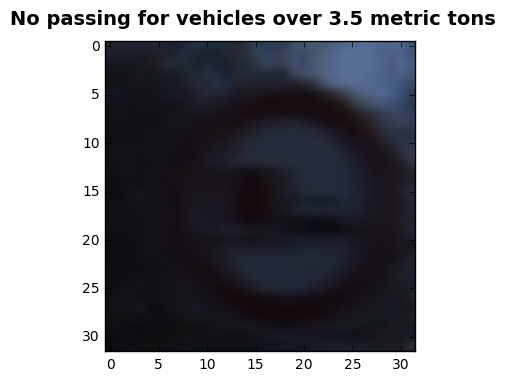

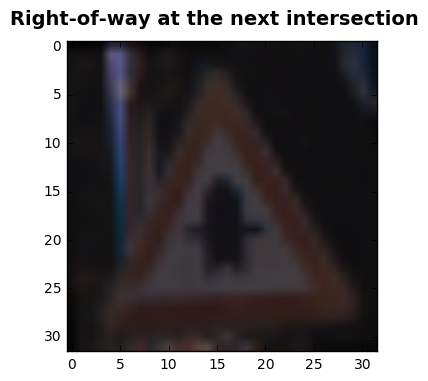

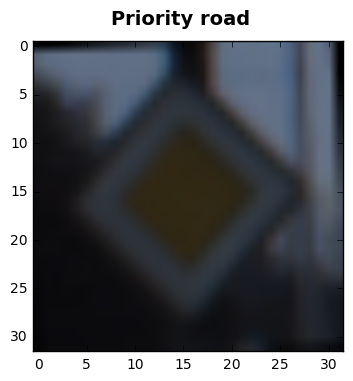

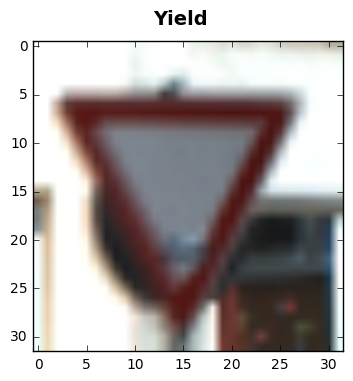

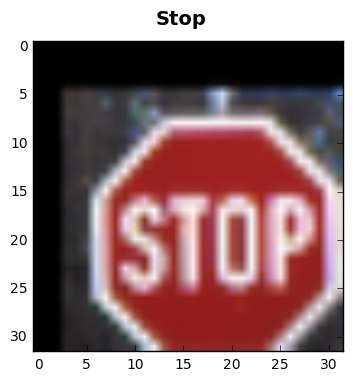

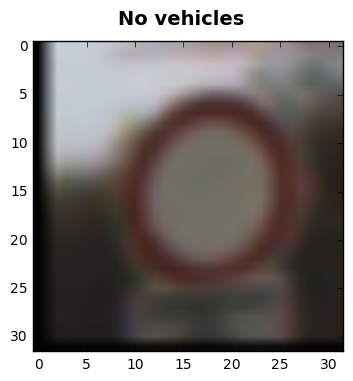

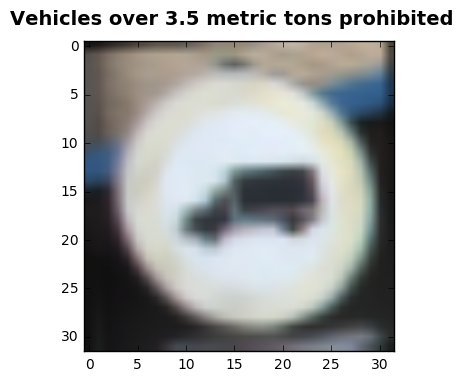

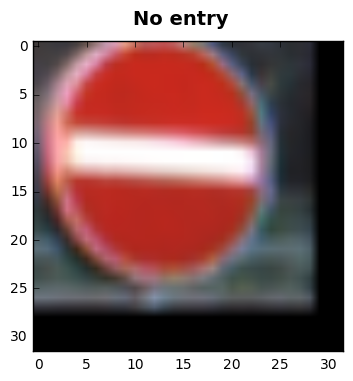

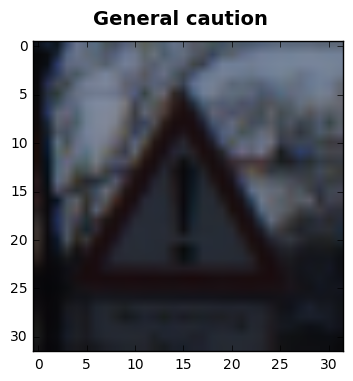

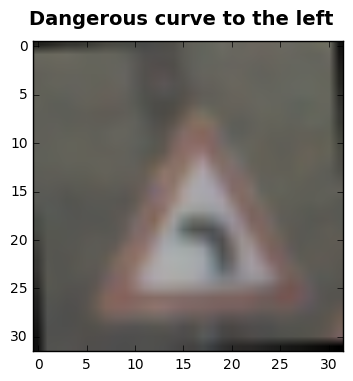

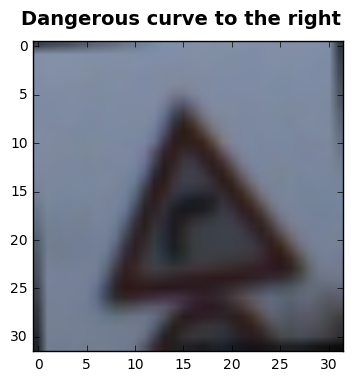

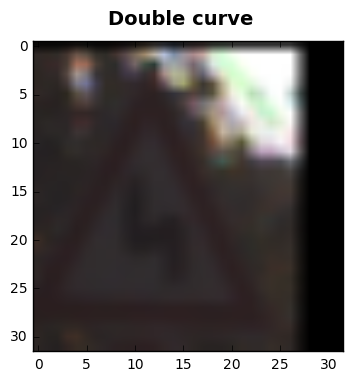

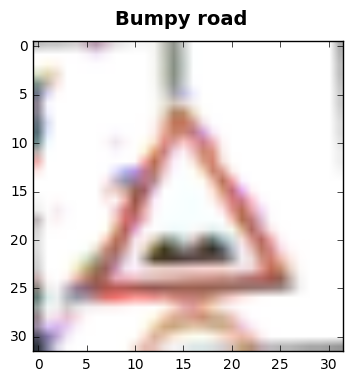

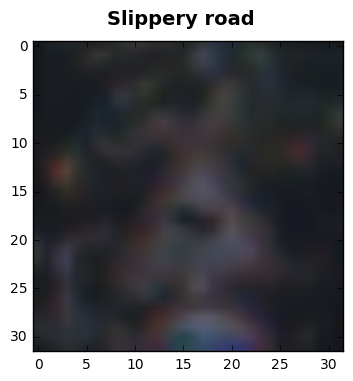

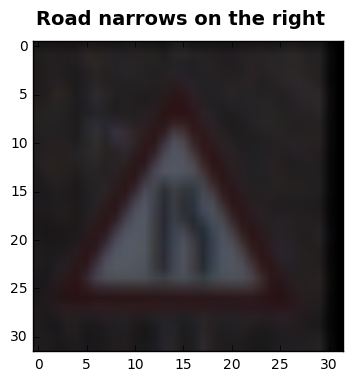

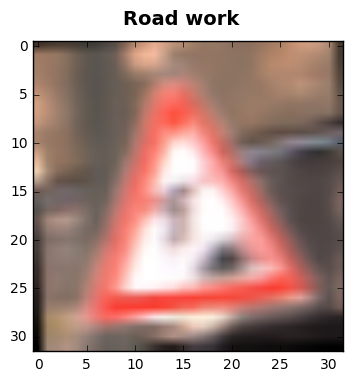

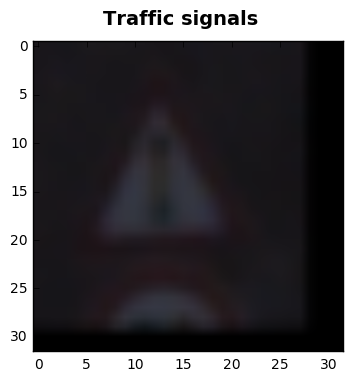

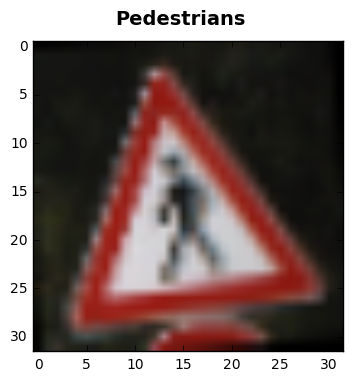

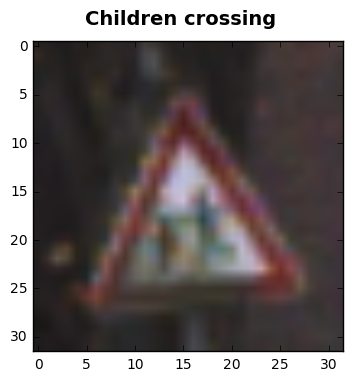

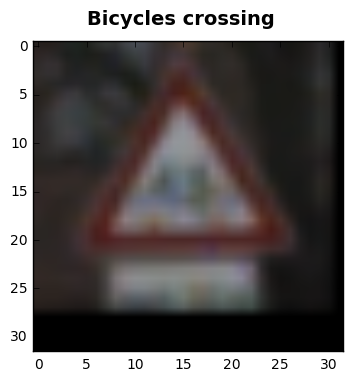

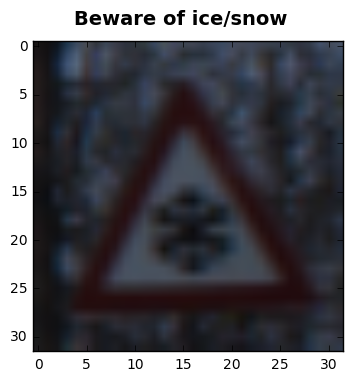

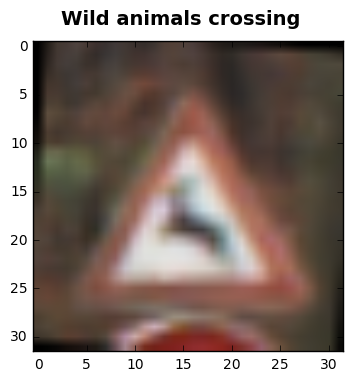

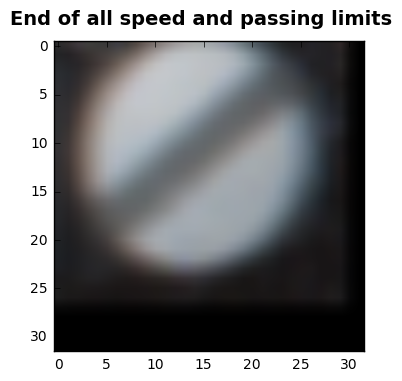

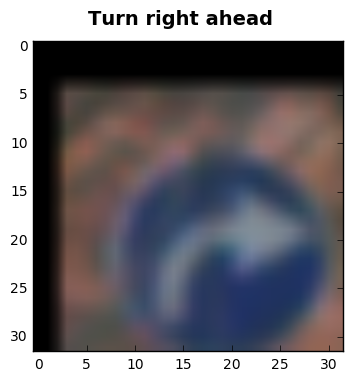

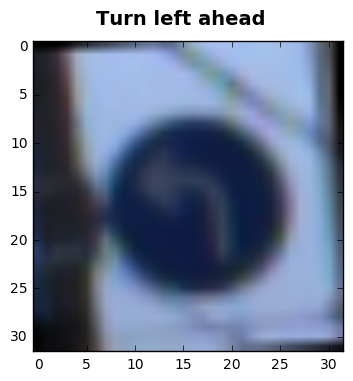

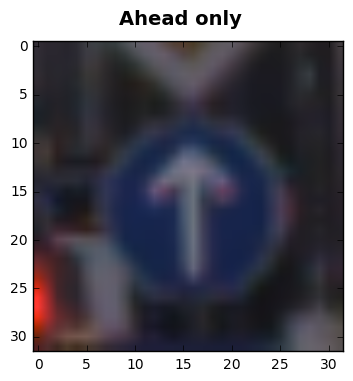

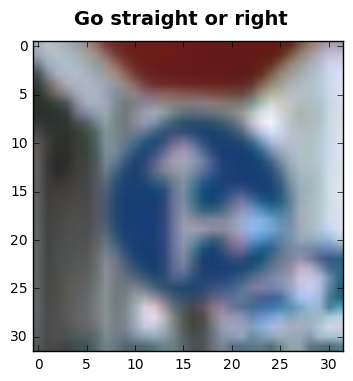

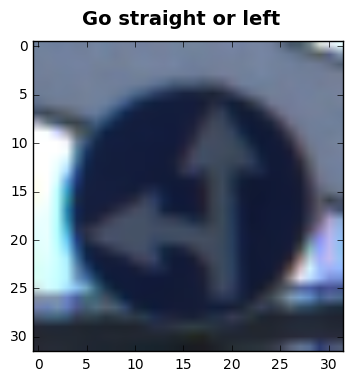

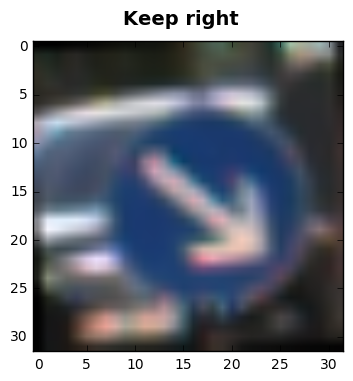

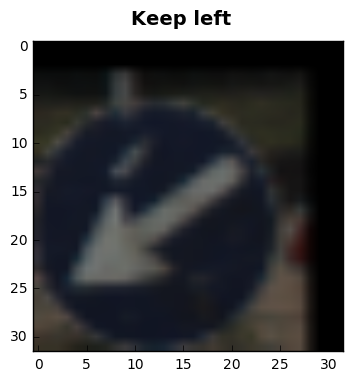

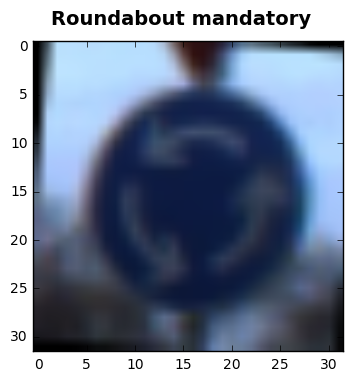

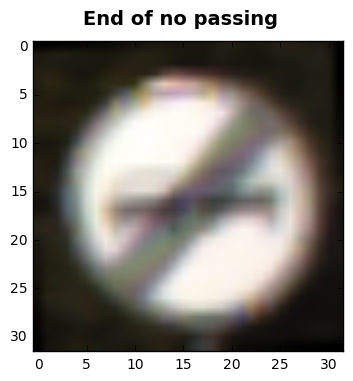

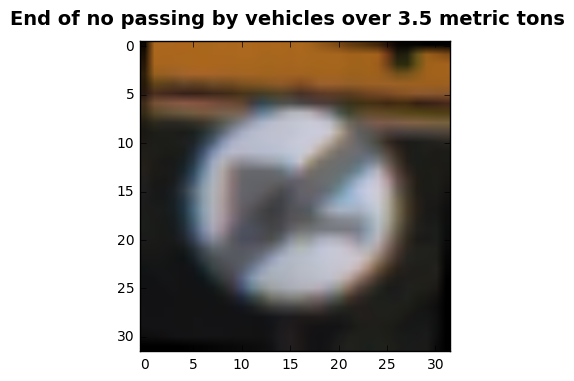

In [8]:
# Plot the first occurence of each sign
for i in range(len(signname)):
    a = np.where(y_train==i)[0][0]
    plt.suptitle(signname[i], fontsize=14, fontweight='bold')
    plt.imshow(X_train[a])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 64

In [12]:
from tensorflow.contrib.layers import flatten

def nprint(c):
    """
    print the input tensor and return it
    """
    print(c)
    return c

def LeNet_mod(x):   
    '''
    A modified network based on the LeNet model.
    The input tensor x needs to have a shape of (?, 32, 32, <depth>).
    It will return a graph representing the modified LeNet model
    '''
    (unknown, width, height, depth) = x.get_shape()

    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, int(depth), 6], mean=mu, stddev=sigma)), 
        'wc2': tf.Variable(tf.truncated_normal([1, 1, 6, 6], mean=mu, stddev=sigma)), 
        'wc3': tf.Variable(tf.truncated_normal([1, 1, 6, 6], mean=mu, stddev=sigma)),
        'wc4': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma)),
        'wfc1': tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma)),
        'wfc2': tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([84, n_classes], mean=mu, stddev=sigma))
    }


    biases = {
        'bc1': tf.Variable(tf.truncated_normal([6], mean=mu, stddev=sigma)),
        'bc2': tf.Variable(tf.truncated_normal([6], mean=mu, stddev=sigma)),
        'bc3': tf.Variable(tf.truncated_normal([6], mean=mu, stddev=sigma)),
        'bc4': tf.Variable(tf.truncated_normal([16], mean=mu, stddev=sigma)),
        'bfc1': tf.Variable(tf.truncated_normal([120], mean=mu, stddev=sigma)),
        'bfc2': tf.Variable(tf.truncated_normal([84], mean=mu, stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([n_classes], mean=mu, stddev=sigma))
    }  
    
    ksize = [1, 2, 2 , 1]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    
    c = x
    print("Layer 1")
    c = nprint(tf.nn.conv2d(c, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID', name="C1.conv2d"))
    c = nprint(tf.nn.bias_add(c, biases['bc1'], name="C1.bias"))
    c = nprint(tf.nn.relu(c, name="C1.relu"))
    
    print("Layer 2")    
    c = nprint(tf.nn.conv2d(c, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID', name="C2.conv2d"))
    c = nprint(tf.nn.bias_add(c, biases['bc2'], name="C2.bias"))
    c = nprint(tf.nn.relu(c, name="C2.relu"))
    
    print("Layer 3")    
    c = nprint(tf.nn.conv2d(c, weights['wc3'], strides=[1, 1, 1, 1], padding='VALID', name="C3.conv2d"))
    c = nprint(tf.nn.bias_add(c, biases['bc3'], name="C3.bias"))
    c = nprint(tf.nn.relu(c, name="C3.relu"))
    
    print("Pooling 1")    
    c = nprint(tf.nn.max_pool(c, ksize, strides, padding, name="P1.max_pool"))
    
    print("Layer 4")    
    c = nprint(tf.nn.conv2d(c, weights['wc4'], strides=[1, 1, 1, 1], padding='VALID', name="C4.conv2d"))
    c = nprint(tf.nn.bias_add(c, biases['bc4'], name="C4.bias"))    
    c = nprint(tf.nn.relu(c, name="C4.relu"))
    
    print("Pooling 2")     
    c = nprint(tf.nn.max_pool(c, ksize, strides, padding, name="P2.max_pool"))

    print("Flatten")        
    c = nprint(flatten(c))

    print("Dropout")        
    c = nprint(tf.nn.dropout(c, keep_prob, name="Dropout"))

    print("Fully Connected 1")    
    c = nprint(tf.add(tf.matmul(c, weights['wfc1']), biases['bfc1'], name="fc1.matmul"))
    c = nprint(tf.nn.relu(c, name="fc1.relu")) 

    print("Fully Connected 2")        
    c = nprint(tf.add(tf.matmul(c, weights['wfc2']), biases['bfc2'], name="fc2.matmul"))
    c = nprint(tf.nn.relu(c, name="fc2.relu"))
    
    print("Fully Connected 3")    
    logits = nprint(tf.add(tf.matmul(c, weights['out']), biases['out'], name="out"))
    return logits

In [13]:
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]), name="x")
y = tf.placeholder(tf.int32, (None), name="y")
# on dropout
keep_prob = tf.placeholder(tf.float32, name="keep_prob")
one_hot_y = tf.one_hot(y, n_classes)

In [14]:
rate = 0.0005

logits = LeNet_mod(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Layer 1
Tensor("C1.conv2d:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("C1.bias:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("C1.relu:0", shape=(?, 28, 28, 6), dtype=float32)
Layer 2
Tensor("C2.conv2d:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("C2.bias:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("C2.relu:0", shape=(?, 28, 28, 6), dtype=float32)
Layer 3
Tensor("C3.conv2d:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("C3.bias:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("C3.relu:0", shape=(?, 28, 28, 6), dtype=float32)
Pooling 1
Tensor("P1.max_pool:0", shape=(?, 14, 14, 6), dtype=float32)
Layer 4
Tensor("C4.conv2d:0", shape=(?, 10, 10, 16), dtype=float32)
Tensor("C4.bias:0", shape=(?, 10, 10, 16), dtype=float32)
Tensor("C4.relu:0", shape=(?, 10, 10, 16), dtype=float32)
Pooling 2
Tensor("P2.max_pool:0", shape=(?, 5, 5, 16), dtype=float32)
Flatten
Tensor("Flatten/Reshape:0", shape=(?, 400), dtype=float32)
Dropout
Tensor("Dropout/mul:0", shape=(?, 400), dtype=float32)
Fu

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ... Validation Accuracy = {:.3f}".format(i+1,validation_accuracy))
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess,'/home/carnd/lenet')
    print("Model saved")

Training...

EPOCH 1 ... Validation Accuracy = 0.834
EPOCH 2 ... Validation Accuracy = 0.891
EPOCH 3 ... Validation Accuracy = 0.920
EPOCH 4 ... Validation Accuracy = 0.931
EPOCH 5 ... Validation Accuracy = 0.948
EPOCH 6 ... Validation Accuracy = 0.954
EPOCH 7 ... Validation Accuracy = 0.960
EPOCH 8 ... Validation Accuracy = 0.959
EPOCH 9 ... Validation Accuracy = 0.962
EPOCH 10 ... Validation Accuracy = 0.968
EPOCH 11 ... Validation Accuracy = 0.971
EPOCH 12 ... Validation Accuracy = 0.972
EPOCH 13 ... Validation Accuracy = 0.974
EPOCH 14 ... Validation Accuracy = 0.975
EPOCH 15 ... Validation Accuracy = 0.977
EPOCH 16 ... Validation Accuracy = 0.979
EPOCH 17 ... Validation Accuracy = 0.975
EPOCH 18 ... Validation Accuracy = 0.979
EPOCH 19 ... Validation Accuracy = 0.980
EPOCH 20 ... Validation Accuracy = 0.980
EPOCH 21 ... Validation Accuracy = 0.981
EPOCH 22 ... Validation Accuracy = 0.983
EPOCH 23 ... Validation Accuracy = 0.981
EPOCH 24 ... Validation Accuracy = 0.982
EPOCH 25 ...

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [17]:
### Train your model here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('/home/carnd/lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('/home/carnd/'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.960


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [29]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import os

0.0484668 11 Right-of-way at the next intersection
0.0448645 4 Speed limit (70km/h)
0.0413154 37 Go straight or left
0.0376814 18 General caution
0.0359649 3 Speed limit (60km/h)


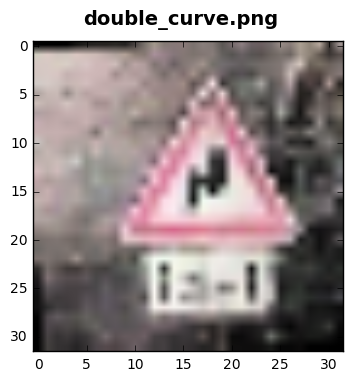

0.0446793 4 Speed limit (70km/h)
0.0425712 10 No passing for vehicles over 3.5 metric tons
0.0361598 18 General caution
0.0333924 3 Speed limit (60km/h)
0.0324722 37 Go straight or left


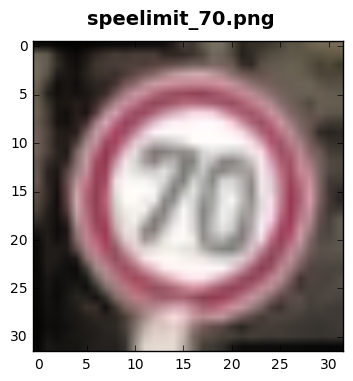

0.0479127 10 No passing for vehicles over 3.5 metric tons
0.0463817 4 Speed limit (70km/h)
0.0383444 11 Right-of-way at the next intersection
0.0374628 37 Go straight or left
0.0362877 38 Keep right


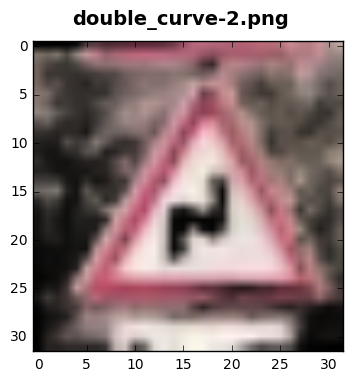

0.0377125 4 Speed limit (70km/h)
0.0376181 10 No passing for vehicles over 3.5 metric tons
0.0335631 38 Keep right
0.0316026 37 Go straight or left
0.0293219 36 Go straight or right


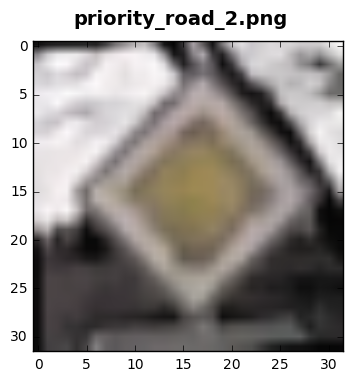

0.0461347 4 Speed limit (70km/h)
0.044429 10 No passing for vehicles over 3.5 metric tons
0.0394799 3 Speed limit (60km/h)
0.0361958 37 Go straight or left
0.0357413 41 End of no passing


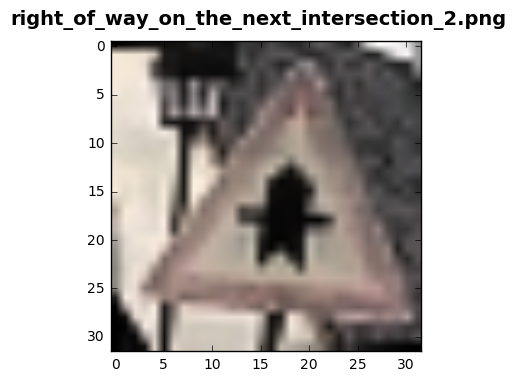

0.0389882 18 General caution
0.03761 4 Speed limit (70km/h)
0.0361969 10 No passing for vehicles over 3.5 metric tons
0.0331191 11 Right-of-way at the next intersection
0.0317974 41 End of no passing


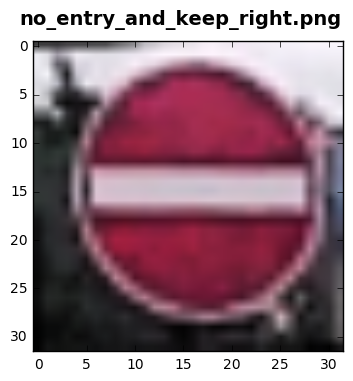

0.0487838 4 Speed limit (70km/h)
0.0394431 10 No passing for vehicles over 3.5 metric tons
0.037998 37 Go straight or left
0.0376814 38 Keep right
0.0375605 3 Speed limit (60km/h)


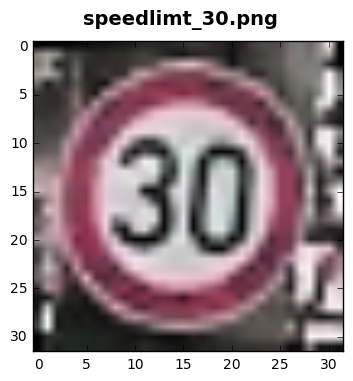

0.0421214 4 Speed limit (70km/h)
0.0390671 37 Go straight or left
0.0372383 10 No passing for vehicles over 3.5 metric tons
0.0348458 11 Right-of-way at the next intersection
0.0321683 18 General caution


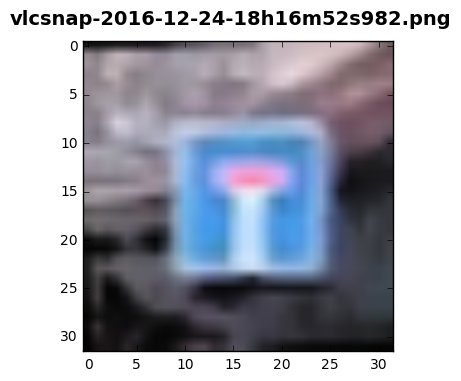

0.0526264 10 No passing for vehicles over 3.5 metric tons
0.0511187 4 Speed limit (70km/h)
0.0448911 37 Go straight or left
0.0441068 11 Right-of-way at the next intersection
0.0403547 38 Keep right


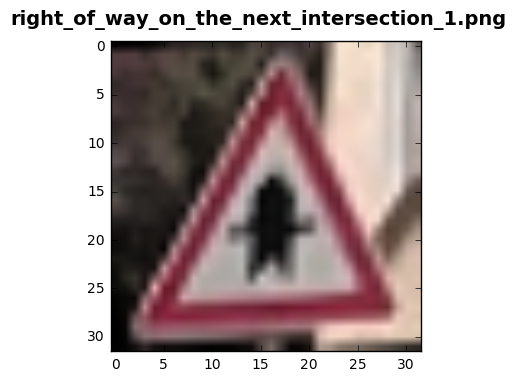

0.0456251 10 No passing for vehicles over 3.5 metric tons
0.038121 18 General caution
0.0369905 38 Keep right
0.0358024 4 Speed limit (70km/h)
0.0333951 37 Go straight or left


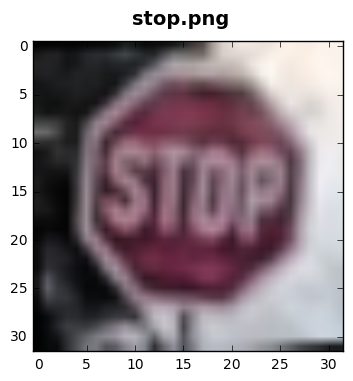

0.0404196 4 Speed limit (70km/h)
0.0390819 10 No passing for vehicles over 3.5 metric tons
0.0352682 37 Go straight or left
0.0317537 38 Keep right
0.031504 18 General caution


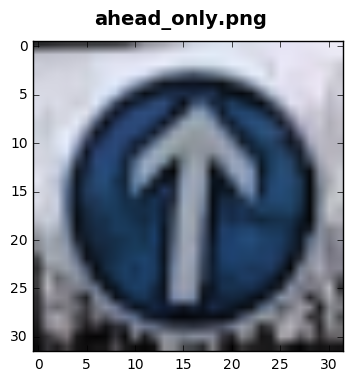

0.0430804 4 Speed limit (70km/h)
0.0375096 10 No passing for vehicles over 3.5 metric tons
0.0309687 37 Go straight or left
0.0300109 38 Keep right
0.0292554 18 General caution


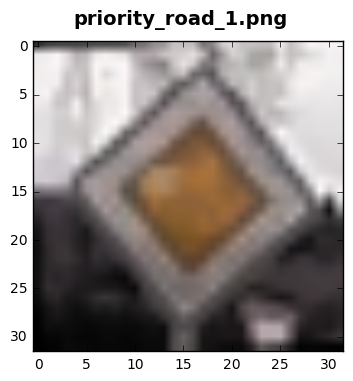

0.041539 37 Go straight or left
0.0391711 4 Speed limit (70km/h)
0.0375734 11 Right-of-way at the next intersection
0.0360361 3 Speed limit (60km/h)
0.0344472 10 No passing for vehicles over 3.5 metric tons


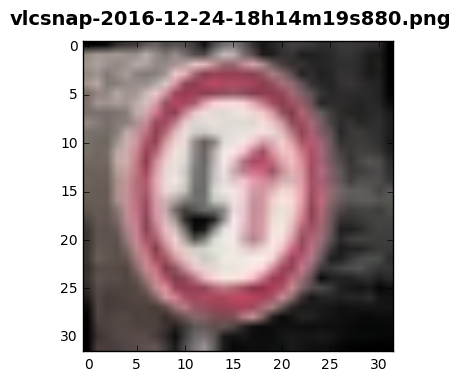

0.048 4 Speed limit (70km/h)
0.0471207 10 No passing for vehicles over 3.5 metric tons
0.0452697 11 Right-of-way at the next intersection
0.0410957 3 Speed limit (60km/h)
0.0346538 37 Go straight or left


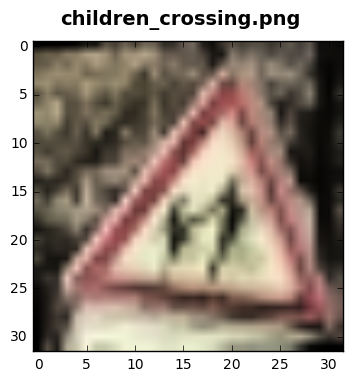

0.0398394 4 Speed limit (70km/h)
0.0389426 10 No passing for vehicles over 3.5 metric tons
0.0306126 37 Go straight or left
0.030291 18 General caution
0.0300667 38 Keep right


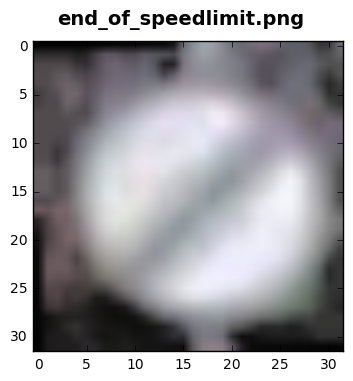

0.044012 4 Speed limit (70km/h)
0.0406456 18 General caution
0.0372484 37 Go straight or left
0.0370569 21 Double curve
0.036874 10 No passing for vehicles over 3.5 metric tons


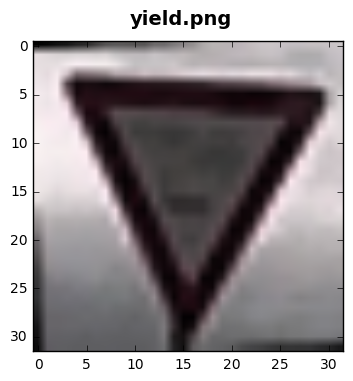

In [39]:
dirs = os.listdir("/home/carnd/git/CarND-Traffic-Sign-Classifier-Project/test_images/")
%matplotlib inline
image_batch = []

for mfile in dirs:
    img = cv2.imread("/home/carnd/git/CarND-Traffic-Sign-Classifier-Project/test_images/"+mfile)# vlcsnap-2016-12-24-18h06m48s010.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    (width, heigth, channels) = img.shape
    z=width
    step=(width+heigth)*2
    for (xx,yy) in product(range(0,width,step),range(0,heigth,step)):
        (rows,cols,ch) = img.shape
        rotation = 3
        M = cv2.getRotationMatrix2D((cols/2,rows/2),rotation,1)
        dst = cv2.warpAffine(img,M,(cols,rows))
        dst = image2(dst)
        small_img = resized_image = cv2.resize(dst[xx:xx+z,yy:yy+z], (32, 32)) 
        image_batch.append(np.copy(small_img))
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: image_batch, keep_prob: 1.0})
    #print(predictions)
    
for myfile, value, predicted, num in zip(dirs,predictions[0], predictions[1],range(len(predictions[0]))):
    pass
    #arg= np.argmax(predicted)
    for i in range(len(value)):
        print(value[i], predicted[i], signname[predicted[i]])
    #if predicted[arg]>0.1 :
    plt.suptitle(myfile, fontsize=14, fontweight='bold')
    plt.imshow(image_batch[num])
    plt.show()        
        

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [21]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.